In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [3]:
#PCA
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for feature_count in range(1 , n_features+1):
    pca = PCA(n_components=feature_count,random_state=42)
    X_reduced = pca.fit_transform(X_train)
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_reduced, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_reduced, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.7s
[Parallel(n_jobs=5)]: Done 240 tasks      | elapsed:   17.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   22.1s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   12.6s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 368 tasks      | elapsed:   10.9s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   13.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   12.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   14.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   16.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   10.8s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   13.7s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 395 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   15.0s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   10.7s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   14.8s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   14.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   10.9s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   13.2s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   11.6s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   14.2s finished


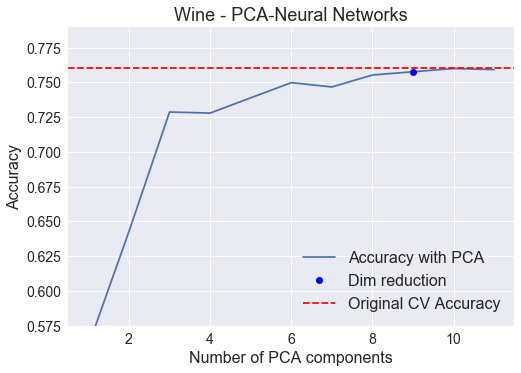

In [4]:
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list, label = 'Accuracy with PCA')
plt.xlabel('Number of PCA components', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - PCA-Neural Networks', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.575,0.79)
plt.plot(9, accuracy_list[8], 'bo', label = 'Dim reduction') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [5]:
#ICA
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for feature_count in range(1 , n_features+1):
    ica = FastICA(n_components = feature_count, random_state = 42,whiten = True)
    X_reduced = ica.fit_transform(X_train)
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_reduced, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_reduced, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   10.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   12.6s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 374 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   17.7s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   15.3s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   10.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    6.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    7.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.6s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    8.7s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:   10.6s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    8.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    8.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.0s finished


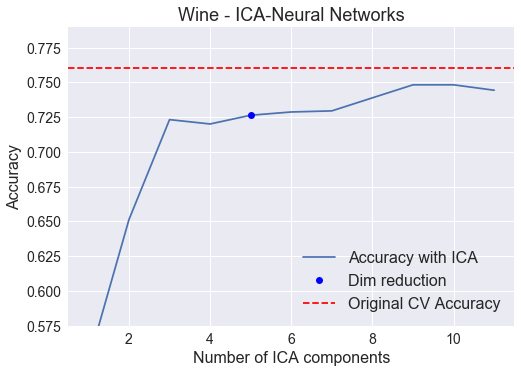

In [6]:
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list, label = 'Accuracy with ICA')
plt.xlabel('Number of ICA components', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - ICA-Neural Networks', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.575,0.79)
plt.plot(5, accuracy_list[4], 'bo', label = 'Dim reduction') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [7]:
#Randomized projection
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for feature_count in range(1 , n_features+1):
    transformer = random_projection.GaussianRandomProjection(n_components=feature_count,random_state=42)
    X_reduced = transformer.fit_transform(X_train)
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_reduced, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_reduced, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    7.5s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    7.9s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    6.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    6.5s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.7s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    6.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    6.4s finished


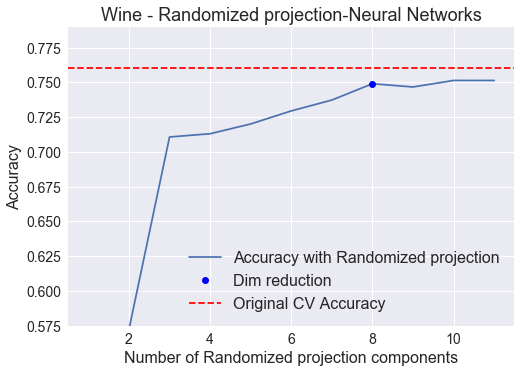

In [8]:
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list, label = 'Accuracy with Randomized projection')
plt.xlabel('Number of Randomized projection components', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - Randomized projection-Neural Networks', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.575,0.79)
plt.plot(8, accuracy_list[7], 'bo', label = 'Dim reduction') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [9]:
#Recursive feature selection
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for feature_count in range(1 , n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature_count)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_reduced, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_reduced, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.8s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    9.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.5s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.8s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.8s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.2s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.5s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.3s finished


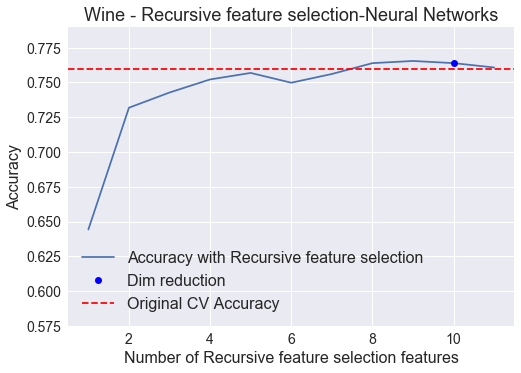

In [10]:
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list, label = 'Accuracy with Recursive feature selection')
plt.xlabel('Number of Recursive feature selection features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - Recursive feature selection-Neural Networks', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.575,0.79)
plt.plot(10, accuracy_list[9], 'bo', label = 'Dim reduction') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [11]:
#Measure wall clock time
y_train=y_train.astype('int')
y_test=y_test.astype('int')
#1.Orig model
time_list = []
accuracy_score_list = []
start = time.time()
orig_model = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

orig_model.fit(X_train,y_train)
y_test_pred = orig_model.predict(X_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(orig_model, X_train, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)
end = time.time()
time_list.append(end - start)

#2.PCA
pca = PCA(n_components=9,random_state=42)
X_reduced = pca.fit_transform(X_train)
X_reduced_test = pca.fit_transform(X_test)

start = time.time()
pca_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), max_iter=12,
              random_state=42, solver='lbfgs')
pca_model.fit(X_reduced, y_train)
y_test_pred = pca_model.predict(X_reduced_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(pca_model, X_reduced, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)
end = time.time()

time_list.append(end - start)


#3.ICA
ica = FastICA(n_components = 5, random_state = 42,whiten = True)
X_reduced = ica.fit_transform(X_train)
X_reduced_test = ica.fit_transform(X_test)

start = time.time()
ica_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(11,), max_iter=15,
              random_state=42, solver='lbfgs')
ica_model.fit(X_reduced, y_train)
y_test_pred = ica_model.predict(X_reduced_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(ica_model, X_reduced, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)
end = time.time()
    
time_list.append(end - start)

#3.Randomized projection

transformer = random_projection.GaussianRandomProjection(n_components=8,random_state=42)
X_reduced = transformer.fit_transform(X_train)
X_reduced_test = transformer.fit_transform(X_test)


start = time.time()
rp_model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(11,), max_iter=20,
              random_state=42, solver='lbfgs')
rp_model.fit(X_reduced, y_train)
y_test_pred = rp_model.predict(X_reduced_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(rp_model, X_reduced, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)

end = time.time()
    
time_list.append(end - start)


#4.Recursive feature selection

selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
selector = selector.fit(X_train, y_train)
X_reduced = X_train[:,selector.support_]

selector = selector.fit(X_test, y_test)
X_reduced_test = X_test[:,selector.support_]

start = time.time()
rfe_model = MLPClassifier(hidden_layer_sizes=(8,), max_iter=27, random_state=42,
              solver='lbfgs')
rfe_model.fit(X_reduced, y_train)
y_test_pred = rfe_model.predict(X_reduced_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(rfe_model, X_reduced, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)

end = time.time()
    
time_list.append(end - start)





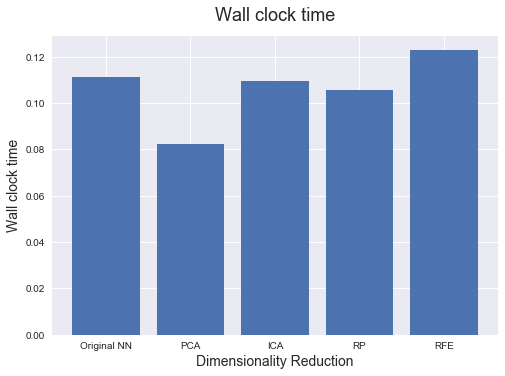

In [12]:
plt.bar(['Original NN','PCA','ICA','RP','RFE'],time_list)
plt.ylabel('Wall clock time', fontsize = 14)
plt.xlabel('Dimensionality Reduction', fontsize = 14)
plt.title('Wall clock time', fontsize = 18, y = 1.03)
plt.show()

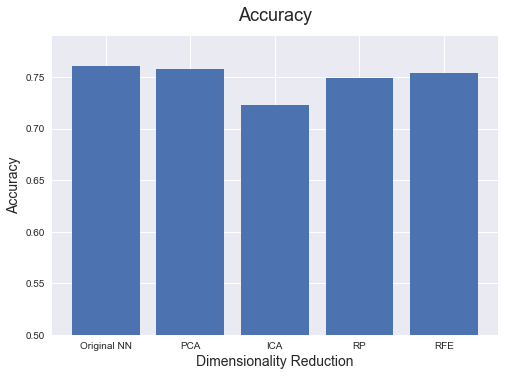

In [13]:
plt.bar(['Original NN','PCA','ICA','RP','RFE'],accuracy_score_list)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Dimensionality Reduction', fontsize = 14)
plt.title('Accuracy', fontsize = 18, y = 1.03)
plt.ylim(0.5,0.79)
plt.show()